In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
dfuji = pd.read_csv("/content/labeling_cfw.csv")
dfuji.head()




,pubdate,author,title,label
0,10/5/2022 22:43,pickyboboo,RT @CNNIndonesia: Renjun NCT Dream Cicipi Catw...,netral
1,10/5/2022 21:46,sat33ayam,@ters4ngkut Selamat eenya pernah menyentuh klo...,positif
2,10/5/2022 21:44,icesburst,@shaiIyn @ouraass citayam mah di sudirman,netral
3,10/5/2022 21:32,blackathens11,"@CommuterLine Saya gatau pastinya, ini KRL men...",netral
4,10/5/2022 21:31,depok_pos,"Citayam Fashion Week, Kebebasan atau Kebablasa...",positif


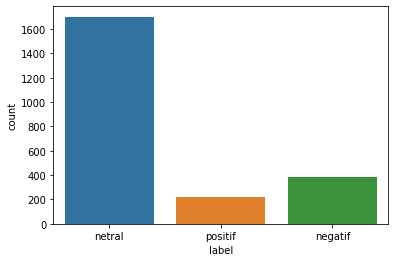

In [ ]:
import seaborn as sns
sns.countplot(x="label", data=dfuji,)

In [ ]:
dfuji.info


<bound method DataFrame.info of               pubdate           author  \
0     10/5/2022 22:43       pickyboboo   
1     10/5/2022 21:46        sat33ayam   
2     10/5/2022 21:44        icesburst   
3     10/5/2022 21:32    blackathens11   
4     10/5/2022 21:31        depok_pos   
...               ...              ...   
2303   9/28/2022 2:31        FOOD_FESS   
2304   9/28/2022 1:57  abcdefghi__ding   
2305   9/28/2022 1:49       fIamingurl   
2306   9/28/2022 1:22       detikforum   
2307   9/28/2022 0:34          jawapos   

                                                  title    label  
0     RT @CNNIndonesia: Renjun NCT Dream Cicipi Catw...   netral  
1     @ters4ngkut Selamat eenya pernah menyentuh klo...  positif  
2             @shaiIyn @ouraass citayam mah di sudirman   netral  
3     @CommuterLine Saya gatau pastinya, ini KRL men...   netral  
4     Citayam Fashion Week, Kebebasan atau Kebablasa...  positif  
...                                                 ...      

In [ ]:
dfuji.dropna()

,pubdate,author,title,label
0,10/5/2022 22:43,pickyboboo,RT @CNNIndonesia: Renjun NCT Dream Cicipi Catw...,netral
1,10/5/2022 21:46,sat33ayam,@ters4ngkut Selamat eenya pernah menyentuh klo...,positif
2,10/5/2022 21:44,icesburst,@shaiIyn @ouraass citayam mah di sudirman,netral
3,10/5/2022 21:32,blackathens11,"@CommuterLine Saya gatau pastinya, ini KRL men...",netral
4,10/5/2022 21:31,depok_pos,"Citayam Fashion Week, Kebebasan atau Kebablasa...",positif
...,...,...,...,...
2303,9/28/2022 2:31,FOOD_FESS,"Guis doain yaa jualan sender laris hari ini, i...",netral
2304,9/28/2022 1:57,abcdefghi__ding,@pemvuda @YAOIBASERP Mamah aku kan lagi trip k...,netral
2305,9/28/2022 1:49,fIamingurl,bonkers of citayam https://t.co/tyfcOspRpP,netral
2306,9/28/2022 1:22,detikforum,Nasib Roy dan Ale Citayam Usai CFW Bubar https...,positif


In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#simpan kata-kata stopword

f = open("stopword_list_tala.txt", "r")
isi = f.read()

tempStoplist = []
for tempstp in isi.split():
  tempStoplist.append(tempstp.lower())

In [ ]:
cleantext = "(@[A-Za-z0-9_-]+)|([^A-Za-z \t\n])|(\w+:\/\/\S+)|(x[A-Za-z0-9]+)|(X[A-Za-z0-9]+)" #regex untuk remove punctuation

def preprocessing(teks):
  teks = teks.rstrip("\n")
  teks = re.sub(r'^https?:\/\/.*[\r\n]*', '', teks, flags=re.MULTILINE)
  teks = re.sub(cleantext,' ',str(teks).lower()).strip() #casefolding dan remove punctuation
 # teks = re.sub(r'[0-9]+', '', teks, flags=re.MULTILINE)
  tokens = []
  for token in teks.split():
    #if token in templist:
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      token = stemmer.stem(token) #lakukan stemming
      if len(token) >= 2:
     #if token != 'b':
       if token != 'rt':
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
dfuji['Teksbersih'] = dfuji.title.apply(lambda x:preprocessing(x))
dfuji.head()

,pubdate,author,title,label,Teksbersih
0,10/5/2022 22:43,pickyboboo,RT @CNNIndonesia: Renjun NCT Dream Cicipi Catw...,netral,renjun nct dream cicip catwalk citayam fashion...
1,10/5/2022 21:46,sat33ayam,@ters4ngkut Selamat eenya pernah menyentuh klo...,positif,selamat eenya sentuh kloset citayam
2,10/5/2022 21:44,icesburst,@shaiIyn @ouraass citayam mah di sudirman,netral,citayam mah sudirman
3,10/5/2022 21:32,blackathens11,"@CommuterLine Saya gatau pastinya, ini KRL men...",netral,gatau pasti krl bogor sekitar jam nyampe st ci...
4,10/5/2022 21:31,depok_pos,"Citayam Fashion Week, Kebebasan atau Kebablasa...",positif,citayam fashion week bebas bablas ekspres


In [ ]:
# dfuji.drop(['Teksbersih'],inplace=True,axis=1)
# dfuji.head()

In [ ]:
dfuji.to_csv('teksbersih_cfw.csv')

In [ ]:
label_train = dfuji['label'].to_numpy()
fitur_train = dfuji[['author','Teksbersih']]

print(fitur_train)

               author                                         Teksbersih
0          pickyboboo  renjun nct dream cicip catwalk citayam fashion...
1           sat33ayam                selamat eenya sentuh kloset citayam
2           icesburst                               citayam mah sudirman
3       blackathens11  gatau pasti krl bogor sekitar jam nyampe st ci...
4           depok_pos          citayam fashion week bebas bablas ekspres
...               ...                                                ...
2303        FOOD_FESS  guis doain yaa jual sender laris udah adon dom...
2304  abcdefghi__ding                            mamah trip citayam liat
2305       fIamingurl                                 bonkers of citayam
2306       detikforum  nasib roy ale citayam cfw bubar detikforum cfw...
2307          jawapos         jeje slebew aku hubung roy citayam gimmick

[2308 rows x 2 columns]


In [ ]:
y = dfuji['label']
x = dfuji['Teksbersih']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.feature_extraction.text  import  CountVectorizer

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(x)


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=2)

In [ ]:
print (y_test)

1845     netral
748     negatif
93      negatif
263      netral
1162     netral
         ...   
494      netral
1558     netral
530      netral
1731     netral
39       netral
Name: label, Length: 462, dtype: object


***SVM***


In [ ]:
from sklearn import svm
from  sklearn.svm  import  SVC
clf_liner = svm.SVC(kernel='linear', C=1.5, random_state=42)
clf_rbf = svm.SVC(kernel='rbf', C=1.5, random_state=42)
clf_sigmoid = svm.SVC(kernel='sigmoid', C=1.5, random_state=42)
clf_poly = svm.SVC(kernel='poly', C=1.5, random_state=42)

In [ ]:
clf_liner.fit(x_train,y_train)
clf_rbf.fit(x_train,y_train)
clf_sigmoid.fit(x_train,y_train)
clf_poly.fit(x_train,y_train)

SVC(C=1.5, kernel='poly', random_state=42)

In [ ]:
y_clf_linear = clf_liner.predict(x_test)
y_clf_rbf = clf_rbf.predict(x_test)
y_clf_sigmoid = clf_sigmoid.predict(x_test)
y_clf_poly = clf_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("evaluasi linear ", classification_report(y_test, y_clf_linear),"\n")
print("evaluasi rbf ", classification_report(y_test, y_clf_rbf),"\n")
print("evaluasi sigmoid ", classification_report(y_test, y_clf_sigmoid),"\n")
print("evaluasi poly ", classification_report(y_test, y_clf_poly))

evaluasi linear                precision    recall  f1-score   support

     negatif       0.69      0.43      0.53        79
      netral       0.80      0.95      0.87       326
     positif       0.77      0.30      0.43        57

    accuracy                           0.78       462
   macro avg       0.75      0.56      0.61       462
weighted avg       0.78      0.78      0.76       462
 

evaluasi rbf                precision    recall  f1-score   support

     negatif       0.68      0.24      0.36        79
      netral       0.75      0.98      0.85       326
     positif       0.83      0.18      0.29        57

    accuracy                           0.75       462
   macro avg       0.76      0.46      0.50       462
weighted avg       0.75      0.75      0.70       462
 

evaluasi sigmoid                precision    recall  f1-score   support

     negatif       0.62      0.37      0.46        79
      netral       0.78      0.95      0.85       326
     positif       0.7

In [ ]:
from sklearn.metrics import accuracy_score
x  =  vectorizer.fit_transform(dfuji.Teksbersih.values)
y  =  dfuji.label.values

svc  =  SVC()
clfr  =  svm.SVC(kernel='linear',  C=1.5 ,random_state=42)

svc.fit(x_train,  y_train)
clfr.fit(x_train,  y_train)

svc_prediction  =  svc.predict(x_test)
clfrpred  =  clfr.predict(x_test)
svc_accuracy  =  accuracy_score(y_test,svc_prediction)
clfrakr  =  accuracy_score(y_test,  clfrpred)
print("Training  accuracy  Score	:  ",clfr.score(x_train,y_train))
print("Vallidation  accuracy  Score	:  ",clfrakr  )
print(classification_report(clfrpred,y_test))

Training  accuracy  Score	:   0.9674972914409534
Vallidation  accuracy  Score	:   0.7835497835497836
              precision    recall  f1-score   support

     negatif       0.43      0.69      0.53        49
      netral       0.95      0.80      0.87       391
     positif       0.30      0.77      0.43        22

    accuracy                           0.78       462
   macro avg       0.56      0.75      0.61       462
weighted avg       0.87      0.78      0.81       462



In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


In [ ]:
conf = metrics.accuracy_score(y_test, clfrpred)
conf


0.7835497835497836

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
import matplotlib.pyplot as plt
import itertools

TypeError: ignored

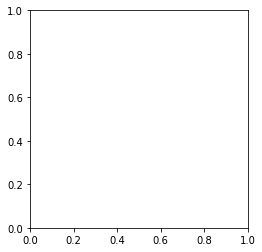

In [ ]:
classes = [0,1,2]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

**WordCloud**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
hatred_words = ' '.join(dfuji[dfuji.label == "negatif"].Teksbersih.values)
non_hatred_words = ' '.join(dfuji[dfuji.label == "positif"].Teksbersih.values)
netral = ' '.join(dfuji[dfuji.label == "netral"].Teksbersih.values)

In [ ]:
plt.figure(figsize=(20, 8))

cloud1 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(non_hatred_words)
plt.subplot(131)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Positive', size=20)

cloud2 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(hatred_words)
plt.subplot(132)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Negative', size=20)

cloud3 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(netral)
plt.subplot(133)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.title('Neutral', size=20)

plt.show()

**Word Cloud**

In [ ]:
hatred_words = ' '.join(dfpred[dfpred.labelhasil == "negatif"].teksbersih.values)
non_hatred_words = ' '.join(dfpred[dfpred.labelhasil == "positif"].teksbersih.values)
netral = ' '.join(dfpred[dfpred.labelhasil == "netral"].teksbersih.values)

In [ ]:
plt.figure(figsize=(20, 8))

cloud1 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(non_hatred_words)
plt.subplot(131)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Positive', size=20)

cloud2 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(hatred_words)
plt.subplot(132)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Negative', size=20)

cloud3 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(netral)
plt.subplot(133)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.title('Neutral', size=20)

plt.show()